In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def read_nonadditive_table(files, group):
    dfs = []
    for file in files:
        if os.path.exists(file):
            df_nc = pd.read_csv(file, usecols=["Expected_value", "Observed_value"])
            dfs.append(df_nc)
    nonadditive_df = pd.concat(dfs)
    nonadditive_df["group"] = group
    return nonadditive_df

In [3]:
root_dir = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization"
groups = ["white_british_male", "white_british_female", "pre_menopause", "post_menopause"]


nonadditive_dfs = []

for group in groups:
    combo2_file = os.path.join(root_dir, group, "data/additive/combo2.csv")
    combo3_file = os.path.join(root_dir, group, "data/additive/combo3.csv")
    nonadditive_df_group = read_nonadditive_table([combo2_file, combo3_file], group)
    nonadditive_dfs.append(nonadditive_df_group)

In [4]:
nonadditive_df = pd.concat(nonadditive_dfs).melt(id_vars=["group"], value_vars=["Observed_value", "Expected_value"])

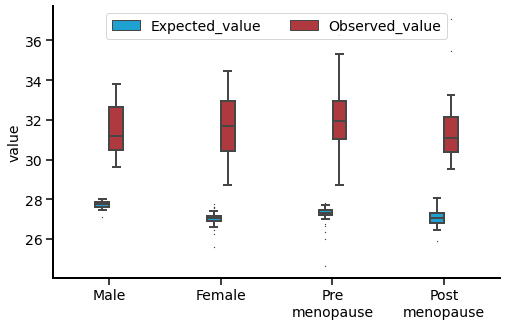

In [5]:
boxdf = nonadditive_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(8, 5))

# Box Plot
sns_ax = sns.boxplot(
    data=boxdf,
    x="group",
    y="value",
    hue="variable",
    hue_order=["Expected_value", "Observed_value"],
    palette=["#00ADEE", "#c1272d"],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    orient="v",
    width=0.25,
    linewidth=2,
    fliersize=0.5,
    ax=ax
    )

# Adjust Axis
sns_ax.set_xlabel("")
sns_ax.set_xticklabels(["Male", "Female", "Pre\nmenopause", "Post\nmenopause"], rotation=0) # sns_ax.get_xticklabels(

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# legend below as multiple columns
h,l = sns_ax.axes.get_legend_handles_labels()
sns_ax.axes.legend_.remove()
sns_ax.legend(h,l, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1))